# Coursework 1: Image filtering

In this coursework you will practice image filtering techniques, which are commonly used to smooth, sharpen or add certain effects to images. 
The coursework includes both coding questions and written questions. Please read both the text and code comment in this notebook to get an idea what you are expected to implement.

## What to do?

* Complete and run the code using `jupyter-lab` or `jupyter-notebook` to get the results.

* Export (File | Export Notebook As...) or print (using the print function of your browser) the notebook as a pdf file, which contains your code, results and text answers, and upload the pdf file onto [Cate](https://cate.doc.ic.ac.uk).

* If Jupyter-lab does not work for you, you can also use Google Colab to write the code and export the pdf file.

## Dependencies:

If you do not have Jupyter-Lab on your laptop, you can find information for installing Jupyter-Lab [here](https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html).

There may be certain Python packages you may want to use for completing the coursework. We have provided examples below for importing libraries. If some packages are missing, you need to install them. In general, new packages (e.g. imageio etc) can be installed by running 

`pip3 install [package_name]`

in the terminal. If you use Anaconda, you can also install new packages by running `conda install [package_name]` or using its graphic user interface.

In [23]:
# Import libaries (provided)
import imageio
import numpy as np
import matplotlib.pyplot as plt
import noise
import scipy
import scipy.signal
import math
import time
import datetime

## 1. Moving average filter.

Read a specific input image and add noise to the image. Design a moving average filter of kernel size 3x3 and 11x11 respectively. Perform image filtering on the noisy image.

Design the kernel of the filter by yourself. Then perform 2D image filtering using the function `scipy.signal.convolve2d()`.

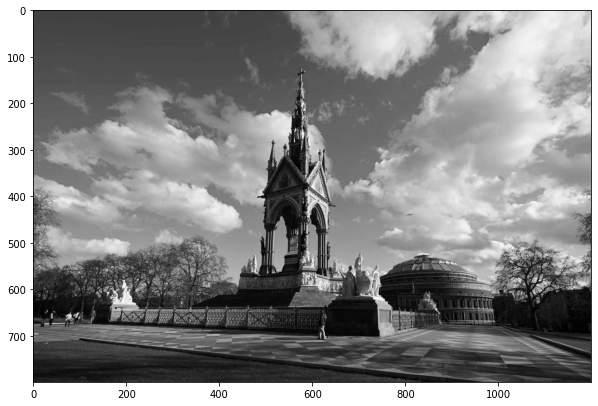

In [24]:
# Read the image (provided)
image = imageio.imread('hyde_park.jpg')
plt.imshow(image, cmap='gray')
plt.gcf().set_size_inches(10, 8)

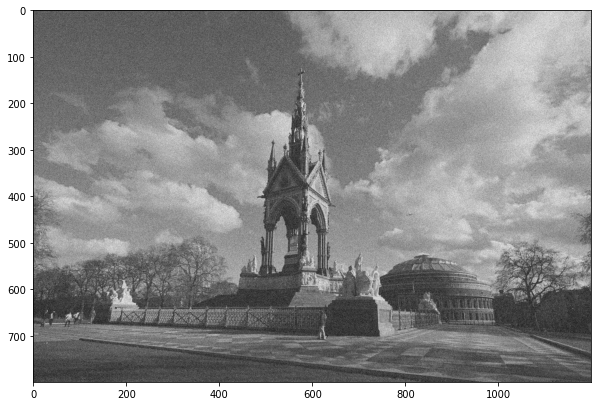

In [25]:
# Corrupt the image with Gaussian noise (provided)
image_noisy = noise.add_noise(image, 'gaussian')
plt.imshow(image_noisy, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### Note: from now on, please use the noisy image as the input for the filters.

### 1.1 Filter the noisy image with a 3x3 moving average filter. Show the filtering results. (5 points)

Filter h:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


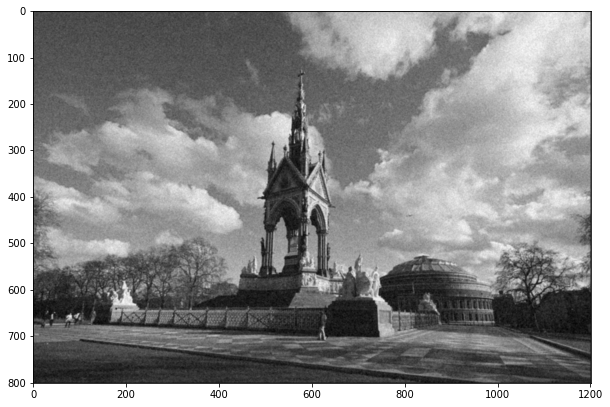

In [26]:
# Design the filter h
h = np.full((3,3), 1 / (3 ** 2)) 

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h) 

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### 1.2 Filter the noisy image with a 11x11 moving average filter. (5 points)

Filter h:
[[0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.008

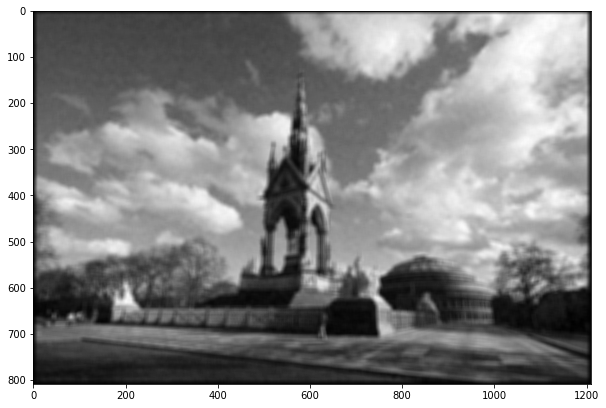

In [27]:
# Design the filter h
h = np.full((11,11), 1 / (11 ** 2))

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h)

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### 1.3 Comment on the filtering results. How do different kernel sizes influence the filtering results? (10 points)

From the 2 experiments above, the `3x3` filter produces a sharper image than the `11x11` filter. When we use a larger kernel, we are not only taking into account more pixels but also pixels further away from the pixel we are replacing. As a result, there is a higher chance that we are taking into account the colours corresponding to other objects, for example, pixels beyond the current object's edges. Therefore, instead of trying to use the colours of neighbouring pixels to try remove noise, we are blending with colours of the surrounding, leading to a blurrier image. On the other hand, if the kernel is too small, it might not have enough information about the surroundings to remove the noise, leading to a less accurate result. In conclusion, the size of the kernel can be considered a hyperparameter that needs case-specific tuning.

## 2. Edge detection.

Perform edge detection using Prewitt filtering, as well as Gaussian + Prewitt filtering.

### 2.1 Implement 3x3 Prewitt filters and convolve with the noisy image. (10 points)

prewitt_x:
[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]
prewitt_y:
[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


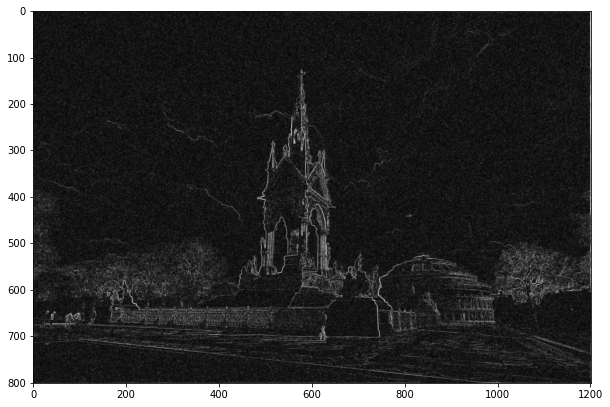

In [28]:
# Design the Prewitt filters
prewitt_x = np.tile([1, 0, -1], (3,1)) 
prewitt_y = prewitt_x.T

# Prewitt filtering
image_filter_x = scipy.signal.convolve2d(image_noisy, prewitt_x)
image_filter_y = scipy.signal.convolve2d(image_noisy, prewitt_y)


# Calculate the gradient magnitude
grad_mag_squared = np.square(image_filter_x) + np.square(image_filter_y)
grad_mag = np.sqrt(grad_mag_squared)

# Print the filters (provided)
print('prewitt_x:')
print(prewitt_x)
print('prewitt_y:')
print(prewitt_y)

# Display the gradient magnitude image (provided)
plt.imshow(grad_mag, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### 2.2 Implement a function that generates a 2D Gaussian filter given the parameter $\sigma$. (10 points)

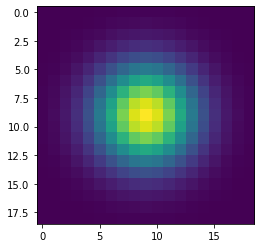

In [29]:
# Design the Gaussian filter
def gaussian_filter_2d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 2D array for the Gaussian kernel
    k = 3
    
    denominator = 1 / (2 * sigma ** 2)
    
    kernel_x = np.tile(np.arange(k * sigma, -k * sigma -1, -1), (2 * k * sigma + 1, 1))
    kernel_y = kernel_x.T
    
    h = np.exp(- denominator * (np.square(kernel_x) + np.square(kernel_y)))
    h = denominator * (1 / math.pi) * h 
    return h

# Visualise the Gaussian filter when sigma = 3 pixel (provided)
sigma = 3
h = gaussian_filter_2d(sigma)
plt.imshow(h)

### 2.3 Perform Gaussian smoothing ($\sigma$ = 3 pixels), followed by Prewitt filtering, show the gradient magnitude image. (5 points)

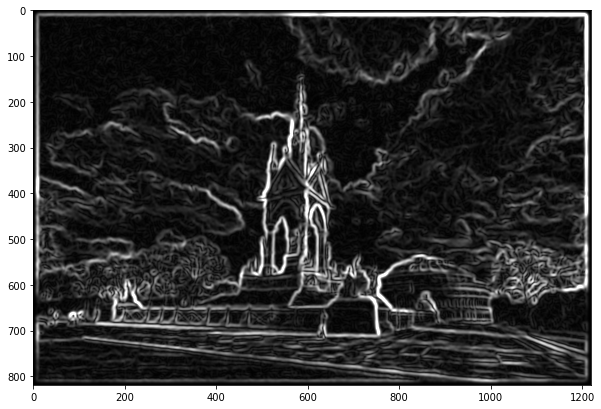

In [30]:
# Perform Gaussian smoothing before Prewitt filtering
gaussian_filter = gaussian_filter_2d(3)
gauss_img = scipy.signal.convolve2d(image_noisy, gaussian_filter)

# Prewitt filtering
prewitt_x = np.tile([1, 0, -1], (3,1)) 
prewitt_y = prewitt_x.T

image_filter_x = scipy.signal.convolve2d(gauss_img, prewitt_x)
image_filter_y = scipy.signal.convolve2d(gauss_img, prewitt_y)

# Calculate the gradient magnitude
grad_mag_squared = np.square(image_filter_x) + np.square(image_filter_y)
grad_mag = np.sqrt(grad_mag_squared)

# Display the gradient magnitude image (provided)
plt.imshow(grad_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)

### 2.4 Perform Gaussian smoothing ($\sigma$ = 7 pixels) and evaluate the computational time for Gaussian smoothing. After that, perform Prewitt filtering. (7 points)

Gaussian smoothing took: 3.355495 secs


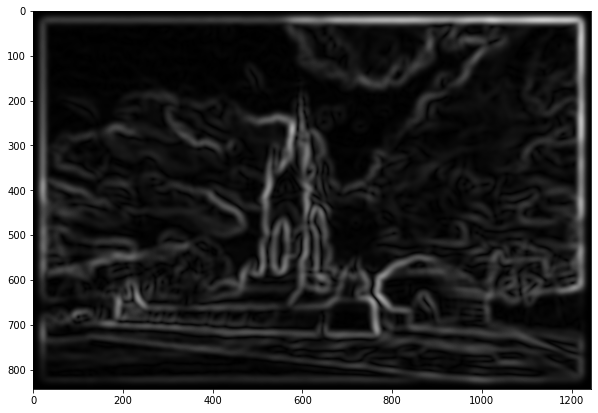

In [31]:
# Construct the Gaussian filter
gaussian_filter = gaussian_filter_2d(7)

# Perform Gaussian smoothing and count time
start = datetime.datetime.now()
gauss_img = scipy.signal.convolve2d(image_noisy, gaussian_filter)
end = datetime.datetime.now()

delta = end - start
print(f'Gaussian smoothing took: {delta.total_seconds()} secs')
      
# Prewitt filtering
prewitt_x = np.tile([1, 0, -1], (3,1)) 
prewitt_y = prewitt_x.T

image_filter_x = scipy.signal.convolve2d(gauss_img, prewitt_x)
image_filter_y = scipy.signal.convolve2d(gauss_img, prewitt_y)     

# Calculate the gradient magnitude
grad_mag_squared = np.square(image_filter_x) + np.square(image_filter_y)
grad_mag = np.sqrt(grad_mag_squared)

# Display the gradient magnitude image (provided)
plt.imshow(grad_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)

### 2.5 Implement a function that generates a 1D Gaussian filter given the parameter $\sigma$. Generate 1D Gaussian filters along x-axis and y-axis respectively. (10 points)

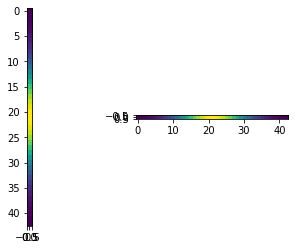

In [32]:
# Design the Gaussian filter
def gaussian_filter_1d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 1D array for the Gaussian kernel
    k = 3
    
    x_squared = np.square(np.arange(k * sigma, -k * sigma - 1, -1))
    exponential = np.exp(-x_squared / (2 * sigma ** 2))
    
    h = exponential / (sigma * math.sqrt(2 * math.pi))
    return h.reshape((2 * k * sigma + 1, 1))

# sigma = 7 pixel (provided)
sigma = 7

# The Gaussian filter along x-axis. Its shape is (1, sz).
h_x = gaussian_filter_1d(sigma)

# The Gaussian filter along y-axis. Its shape is (sz, 1).
h_y = h_x.T

# Visualise the filters (provided)
plt.subplot(1, 2, 1)
plt.imshow(h_x)
plt.subplot(1, 2, 2)
plt.imshow(h_y)

### 2.6 Perform Gaussian smoothing ($\sigma$ = 7 pixels) using two separable filters and evaluate the computational time for separable Gaussian filtering. After that, perform Prewitt filtering, show results and check whether the results are the same as the previous one without separable filtering. (9 points)

Separable smoothing operation took: 0.297316 secs


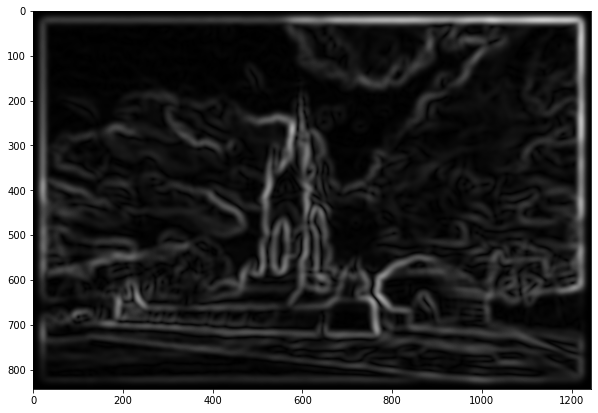

In [33]:
# Perform separable Gaussian smoothing and count time
start = datetime.datetime.now()
smooth_x = scipy.signal.convolve2d(image_noisy, h_x)
smooth_img = scipy.signal.convolve2d(smooth_x, h_y)
end = datetime.datetime.now()

delta = end - start
print(f'Separable smoothing operation took: {delta.total_seconds()} secs')

# Prewitt filtering
prewitt_x = np.tile([1, 0, -1], (3,1)) 
prewitt_y = prewitt_x.T

image_filter_x = scipy.signal.convolve2d(smooth_img, prewitt_x)
image_filter_y = scipy.signal.convolve2d(smooth_img, prewitt_y)     

# Calculate the gradient magnitude
grad_mag2_squared = np.square(image_filter_x) + np.square(image_filter_y)
grad_mag2 = np.sqrt(grad_mag2_squared)

# Display the gradient magnitude image (provided)
plt.imshow(grad_mag2, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)

# Check the difference between the current gradient magnitude map
# and the previous one produced without separable filtering. You
# can report the mean difference between the two.


### 2.7 Comment on the Gaussian + Prewitt filtering results and the computational time. (9 points)

## Filtering Results
In the image produced by the `Prewitt` filter alone (part 2.1), we can see that the edges are very sharp but also very thin. Looking at it more closely, we can also see that the filter can also detect edges very far away or less visible to the human eyes. For example, the edges of pillars and doors in the Royal Albert Hall. In contrast, looking at the results produced by the `Gaussian + Prewitt` filtering technique, there are noticeably less edges, and that the edges are both thicker and more blurry. As we increase the size of the `Gaussian` kernel (increasing the `sigma` parameter), this effect is further amplified. 

This result is predictable since `Prewitt filter` looks at the local difference between horizontal/vertical pixels, the greater the difference, the brighter the resulting pixel. Prior to this, we applied a `2D Gaussian filter` which smoothens the gradient as each pixel is re-coloured using a weighted average of its neighbours. The larger the `Gaussian filter`, the flatter this gradient is going to be. This leads to thicker, less defined defined edges at the end.

## Computational Time
From the experiments, we see that the full 2D filtering operation took around 3.4 seconds whereas the 2-step separable filter operation only took 0.30 seconds, roughly a tenth of the time. This is expected as using a separable filter reduces the number of arithmetic operations massively. The image we used in the experiment has dimensions `798x1200` and we use a Gaussian filter kernel with $\sigma = 3$, thus having a size of `19x19`, meaning it decomposition is 2 `19x1` vectors.

### 2D Kernel
For each pixel, we carry out $19^2 = 361$ multiplications and $19^2 -1 = 360$ additions. There are $798 * 1200 = 957600$ pixels, resulting in a total of $(360 + 361) * 957600 \approx 6.9 * 10^8$ operations.

### Separable Kernel
Each vector has a size of `19 x 1`. For each pixel, we now only have $19$ multiplications and $18$ additions, resulting in a total of $(19 + 18) * 957600 \approx 3.5 * 10^7$ arithmetic operations. We need to do this for 2 vectors, hence about $7.0 * 10^7$ operations in total, 1 order of magnitude smaller than in the 2D kernel case. 

The computational cost in the Separable kernel case is much smaller than in the 2D kernel case, therefore the computational time.

## 3. Challenge: Implement a 2D Gaussian filter using Pytorch.

[Pytorch](https://pytorch.org/) is a machine learning framework that supports filtering and convolution.

The [Conv2D](https://pytorch.org/docs/stable/nn.html#conv2d) operator takes an input array of dimension NxC1xXxY, applies the filter and outputs an array of dimension NxC2xXxY. Here, since we only have one image with one colour channel, we will set N=1, C1=1 and C2=1. You can read the documentation of Conv2D for more detail.

In [34]:
# Import libaries (provided)
import torch

### 3.1 Expand the dimension of the noisy image into 1x1xXxY and convert it to a Pytorch tensor. (7 points)

In [35]:
# Expand the dimension of the numpy array
exp_img = np.expand_dims(image_noisy, axis=(0,1))

# Convert to a Pytorch tensor using torch.from_numpy
img_tensor = torch.from_numpy(exp_img).to(torch.float32)

### 3.2 Create a Pytorch Conv2D filter, set its kernel to be a 2D Gaussian filter. (7 points)

In [36]:
# A 2D Gaussian filter when sigma = 3 pixel (provided)
sigma = 3
h = gaussian_filter_2d(sigma)
print(h.shape)

# Create the Conv2D filter (provided)
conv = torch.nn.Conv2d(1, 1, h.shape)

# Set the kernel weight
kernel_padded = np.expand_dims(h, axis=(0,1))
kernel_tensor = torch.from_numpy(kernel_padded).to(torch.float32)
kernel_param = torch.nn.Parameter(kernel_tensor)
conv.weight = kernel_param

(19, 19)


### 3.3 Apply the filter to the noisy image tensor and display the output image. (6 points)

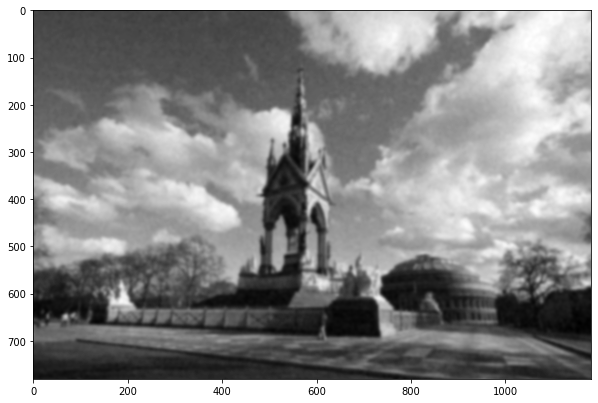

In [37]:
# Filtering
result_tensor = conv(img_tensor)
result_exp = result_tensor.detach().numpy()
image_filtered = np.squeeze(result_exp)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(10, 8)

## 4. Survey: How long does it take you to complete the coursework?

Roughly 4 hours.